# Linear regression

Linear regression is the simplest model of machine learning. 
The purpose of regression is to explain and predict a variable $y$ using a variable $x$ (or several variables $x_{(1)}$, ...,$x_{(n)}$ ).  

The variable $y$ is called the **target** (dependent variable) , and the variables $x$ are called  **feature(s)** (independent variables).

By convention, we call the number of rows $m$. The number of features is represented by $n$.

In this example, $m=7$ and $n=3$.

Note:

In this notebook, every time we will talk about programming variables, we will format the names like `this`. 
For mathematical variables and functions, we'll be formatting them like $this$.

![image dataset](./assets/example_data.png)

## Modeling the problem
In this chapter, we will analyze simple linear regression on an example. This presentation will allow us to explain linear regression in a simple case in order to understand the stakes of this method, the problems posed and the answers brought.

Let's take this dataset which contains data on an employee's salary based on his years of experience.

In [127]:
import pandas as pd

df = pd.read_csv("./data/salary_data.csv")

In [128]:
df.head()

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


**Exercise :** Find the values of $m$ and $n$ of this dataset.

In [129]:
print(df.shape)
m =df.shape[0]
n=df.shape[1]
print(m,n)

(30, 2)
30 2


In [130]:
df.head(30)

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891
5,2.9,56642
6,3.0,60150
7,3.2,54445
8,3.2,64445
9,3.7,57189


In [131]:
df.columns

Index(['YearsExperience', 'Salary'], dtype='object')

In [132]:
print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 608.0 bytes
None
   YearsExperience  Salary
0              1.1   39343
1              1.3   46205
2              1.5   37731
3              2.0   43525
4              2.2   39891


In [133]:
#m= df.iloc[:,1].values
#n= df.iloc[1].values
#print(m)

### 1. Goals
We want to know whether, in general, years of experience have an influence on the wage and in what form this influence can be expressed. The goal is to better explain how wages vary with years of experience and possibly to predict wages based on years of experience.

### 2. Variables studied
In this example, we are going to do a simple regression and we will therefore define two variables.
- The variable `y` is the variable that must be regressed. The target to be predicted.

- The variable `X` which will be the explanatory variable. The feature.

The unofficial convention is to have uppercase `X` because it will usually be a 2D array (multiple features). However it's not the case here. `y` is lower case because it's just a 1D vector.

**Exercise :**  Create the `X` and `y` variables and define which column will be the target and which column will be the feature.  
Variables `X` and `y` be must of type `numpy.ndarray`

In [134]:
import numpy as np
y_target = np.array(df.YearsExperience)
X_features = np.array(df.Salary)
print(y_target, X_features )
#y_target, X_features = df.shape
#print(y_target)
#print(X_features)
#print(df.target)

[ 1.1  1.3  1.5  2.   2.2  2.9  3.   3.2  3.2  3.7  3.9  4.   4.   4.1
  4.5  4.9  5.1  5.3  5.9  6.   6.8  7.1  7.9  8.2  8.7  9.   9.5  9.6
 10.3 10.5] [ 39343  46205  37731  43525  39891  56642  60150  54445  64445  57189
  63218  55794  56957  57081  61111  67938  66029  83088  81363  93940
  91738  98273 101302 113812 109431 105582 116969 112635 122391 121872]


### 3. Relationship between variables
Now it is a question of finding the type of relationship between the two variables.

To do so, we will display in a scatter plot (randomly generated) variables that may or may not have any link between each other. Let's see what kind of relation we can obtain.


**No correlation.**  

Very rounded scatter plot, there is no apparent relationship.
![](./assets/scatter_plot_0.png)

**Positive linear correlation.**  
Very stretched scatter plot. The cloud has a very marked linear shape. There is a tendency for the two variables to vary in the same direction. The observed correlation is positive.

![](./assets/scatter_plot_1.png)

**Negative Linear correlation.**  
The scatterplot is moderately stretched (linear form but less marked), from top left to bottom right: one observes on the sample a tendency of the variables to vary in opposite directions, the observed correlation is negative.

![](./assets/scatter_plot_2.png)

**Perfect non-linear correlation.**  
The points are on a non-linear (parabolic) curve. The correlation observed is perfect, however it's non-linear. There is no monotonicity: the curve is first decreasing and then increasing.

![](./assets/scatter_plot_3.png)

Now let's visualize our dataset on a scatter plot:

**Exercise :** Create a scatter plot with matplotlib and the `X` and `y` data.  
Add the label salary for the y-axis and number of years of experience for the x-axis.

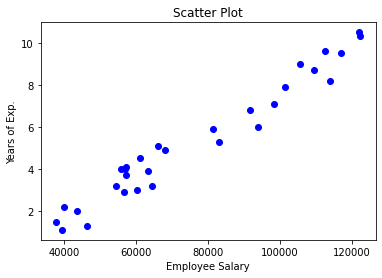

In [135]:
import matplotlib.pyplot as plt
import seaborn as sns
ax = plt.gca()
#print(X_features)
plt.scatter(X_features, y_target, color="blue")
plt.title("Scatter Plot")
plt.xlabel("Employee Salary")
plt.ylabel("Years of Exp.")
plt.show()

You should see the stretched and increasing shape of the scatter plot suggesting a linear-type positive correlation.

We can also check the correlation rate between the variables. 

**Exercise :** Display the correlation rate between the two variables. 

In [136]:
import scipy as sc
print(sc.stats.spearmanr(X_features, y_target))
print(sc.stats.pearsonr(X_features, y_target))

SpearmanrResult(correlation=0.9568313543516999, pvalue=1.4669928938858202e-16)
(0.9782416184887599, 1.1430681092271564e-20)


### 4. Split the dataset

The train-test split procedure is used to estimate the performance of machine learning algorithms when they are used to make predictions on data not used to train the model.

It is a fast and easy procedure to perform, the results of which allow you to compare the performance of machine learning algorithms for your predictive modeling problem.

Generally, the training dataset contains 80% of the whole dataset. The remaining 20% is for the test dataset.

**Exercise :** Import `train_test_split` from `sklearn` and split the dataset and create the variables `X_train`, `X_test`, `y_train`, `y_test`.

In [137]:
X = df.iloc[:, :-1].values
y = df.iloc[:, 1].values
print(X,y)

[[ 1.1]
 [ 1.3]
 [ 1.5]
 [ 2. ]
 [ 2.2]
 [ 2.9]
 [ 3. ]
 [ 3.2]
 [ 3.2]
 [ 3.7]
 [ 3.9]
 [ 4. ]
 [ 4. ]
 [ 4.1]
 [ 4.5]
 [ 4.9]
 [ 5.1]
 [ 5.3]
 [ 5.9]
 [ 6. ]
 [ 6.8]
 [ 7.1]
 [ 7.9]
 [ 8.2]
 [ 8.7]
 [ 9. ]
 [ 9.5]
 [ 9.6]
 [10.3]
 [10.5]] [ 39343  46205  37731  43525  39891  56642  60150  54445  64445  57189
  63218  55794  56957  57081  61111  67938  66029  83088  81363  93940
  91738  98273 101302 113812 109431 105582 116969 112635 122391 121872]


In [141]:
import sklearn
import numpy as np
from sklearn import datasets
from sklearn. model_selection import train_test_split

# Choose your test size to split between training and testing sets:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(y_test)
print(X_test)


[112635  67938 113812  83088  64445  57189]
[[9.6]
 [4.9]
 [8.2]
 [5.3]
 [3.2]
 [3.7]]


In [139]:
#X, y = np.arange(10).reshape((5, 2)), range(5)
#print(X, y)

### 5. Load and fit the model

We could see that the Linear Model could help us make good generalizations about our dataset. However, our model has to train several times on our training set. It is therefore an iterative algorithm. And at each iteration, the algorithm will calculate the error rate of the mean of the trained data set. The algorithm will then try to regress this error rate until it is as small as possible. 

But we are lucky because the sklearn library already has a ready-made linear model that minimizes this error rate. 

**Exercise :** 
1. Import `LinearRegression` from sklearn.
2. Create a `regressor` variable and instantiate your `LinearRegression` class.
2. Train your model with `X_train` and `y_train`.

In [142]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [143]:
print(regressor.intercept_)

25321.583011776813


In [144]:
print(regressor.coef_)

[9423.81532303]


OK, your model is trained.   
But let's check if our model is efficient. To do this we can display the score of our model. That is to say the number of correct predictions that our model was able to make.

**Exercise :** Display the score of your model with `X_train` and `y_train`.

In [147]:
from sklearn.metrics import r2_score
y_pred = regressor.predict(X_train)

r2_score(y_train, y_pred)

0.9645401573418146

Do you have a score above 90% ?   
That's not bad! But let's now check if our model can make generalizations about data it has never seen before. 

### 6. Test your model
The `X_test` and `y_test` sets were previously created. Now it is time to use them. 

**Exercise :** Use the `predict` method of your model on your test dataset (`X_test`).

In [148]:
from sklearn.metrics import r2_score
y_pred = regressor.predict(X_test)

r2_score(y_test, y_pred)

0.9024461774180497

**Exercise :** Display the score of your model with `X_test` and `y_test`.

In [149]:
r2_score(y_test, y_pred)

0.9024461774180497

What's your score? Is it higher than 90%? Awesome!  
To make it more meaningful, we are going to visualize the training and testing of your model.  

**Exercise :** 
1. Plot `regressor.predict(X_train)`
2. Plot the training set on top of it.
3. Add the title "Salary VS Experience (Training set)"
4. Add the label "Years of Experience" on the x-axis and "Salary" on the y-axis


Text(0, 0.5, 'Salary')

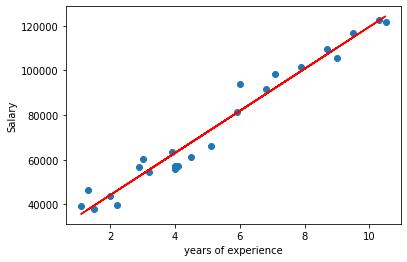

In [152]:

a1= regressor.coef_
a2 = regressor.intercept_
x=X_train
plt.scatter(X_train, y_train)
y=a1*x + a2
plt.plot(x,y,'r')
plt.xlabel('years of experience')
plt.ylabel('Salary')



The expected result should look like this: 
![train_plot](./assets/trainplot.png)

**Exercise :** Do the same with `X_test`!  
1. Plot `regressor.predict(X_test)`
2. Plot the testing set on top of it.
3. Add the title "Salary VS Experience (Test set)"
4. Add the label "Years of Experience" on the x-axis and "Salary" on the y-axis

The expected result should look like this:
![testplot.png](./assets/testplot.png)

**Exercise :** Have fun testing your model by entering new data. To give you an example, according to my model, when I have 210 years of experience, I will earn a salary of 1,982,420 / year. I'm looking forward to reaching that many years of experience 😎.

Text(0, 0.5, 'Salary')

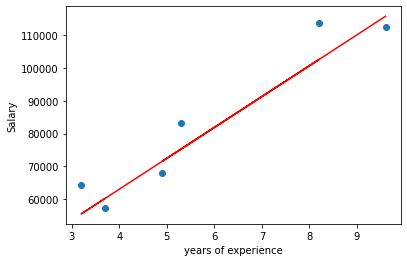

In [154]:
a1= regressor.coef_
a2 = regressor.intercept_
x=X_test
plt.scatter(X_test, y_test)
y=a1*x + a2
plt.plot(x,y,'r')
plt.xlabel('years of experience')
plt.ylabel('Salary')

Congratulations to you! You have just created your first learning machine model. 

![bravo](./assets/bravo.gif)